In [1]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
networks = ['polblogs_beta1p25_00',            'cintestinalis_beta2p00_00',      'foodweb_little_rock_beta1p50_00', 'fao_trade_beta1p75_00',                   'advogato_00',
            'email_company_beta1p50_00',       'sp_high_school_diaries_00',      'us_agencies_washington_00',       'residence_hall_00',                       'celegansneural_00',
            'uni_email_beta1p45_00',           'add_health_comm50_beta1p40_00',  'messal_shale_00',                 'ecoli_transcription_v1_0_beta1p50_00',    'copenhagen_calls_beta1p50_00',
            'us_agencies_vermont_beta2p00_00', 'physician_trust_00',             'un_migrations_beta4p50_00',       'yeast_transcription_beta1p20_00',         'faa_routes_00',
            'copenhagen_sms_beta1p30_00',      'interactome_figeys_beta1p01_00', 'openflights_beta3p25_00',         'celegans_2019_male_chemical_beta2p00_00', 'chess_beta1p30_00']
labels = ['Fig. 4(d)', 'Fig. 4(e)', 'Fig. 4(f)', 'Fig. 4(g)', 'Fig. 4(h)', 'Fig. 4(i)', 'Fig. 4(j)', 'Fig. 4(k)', 'Fig. 4(l)',
          'Fig. S2(a)', 'Fig. S2(b)', 'Fig. S2(c)', 'Fig. S2(d)', 'Fig. S2(e)', 'Fig. S2(f)', 'Fig. S2(g)', 'Fig. S2(h)', 'Fig. S2(i)', 'Fig. S2(j)', 'Fig. S2(k)', 'Fig. S2(l)', 'Fig. S2(m)', 'Fig. S2(n)', 'Fig. S2(o)', 'Fig. S2(p)']
names = ['political blogs', 'tadpole larva brain (C. intestinalis)', 'Little Rock Lake food web', 'FAO trade network', 'Advogato trust network', 'manufacturing company email', 'primary school contacts', 'U.S. government agency websites', 'friendship network',
         'C. elegans connectome', 'email network (Uni. R-V, Spain)', 'frienship network 2', 'Messel Shale food web', 'E. coli transcription network', 'Copenhagen networks study (calls)', 'U.S. government agency websites (VT)', 'physician trust network', 'UN migration stock', 'yeast transcription network', 'FAA preferred routes', 'Copenhagen networks study (sms)', 'Figeys human interactome', 'Openflights airport network', 'C. elegans neurons (male, chemical)', 'chess matches']

In [3]:
filename = '../../directedS1_data/real_networks/network_properties/all_gprop.txt'
header = open(filename, 'r').readline().replace('#', ' ').split()
df = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

markers = cycle(('X', '^', 'D', 'H', 'o', 'p', '>', 'h', 'P', 'v', 's', '<'))
colorMap = dict(zip(networks, sns.color_palette('deep', int(len(networks)))))
markerMap = dict(zip(networks, markers))

recip_real = {network: [] for network in networks}
recip_synth = {network: [] for network in networks}

sizes = []
recip = []

for network in networks:
    
    networkName = network.split('_00')[0].split('_beta')[0]
    
    filename = '../../directedS1_data/synthetic_networks/network_properties/' + network + '_gprop.txt'
    header = open(filename, 'r').readline().replace('#', ' ').split()
    synth_prop = pd.read_table(filename, names=header, comment="#", delimiter=r"\s+", index_col=0)

    recip_synth[network].extend(synth_prop['reciprocity_ratio'])

    recip_real[network].append(df.loc[networkName]['reciprocity_ratio'])

    sizes.append(df.loc[networkName]['nb_vertices'])
    recip.append(df.loc[networkName]['reciprocity_ratio'])

recip, networks, names = zip(*sorted(zip(list(recip), list(networks), list(names)), reverse=True))

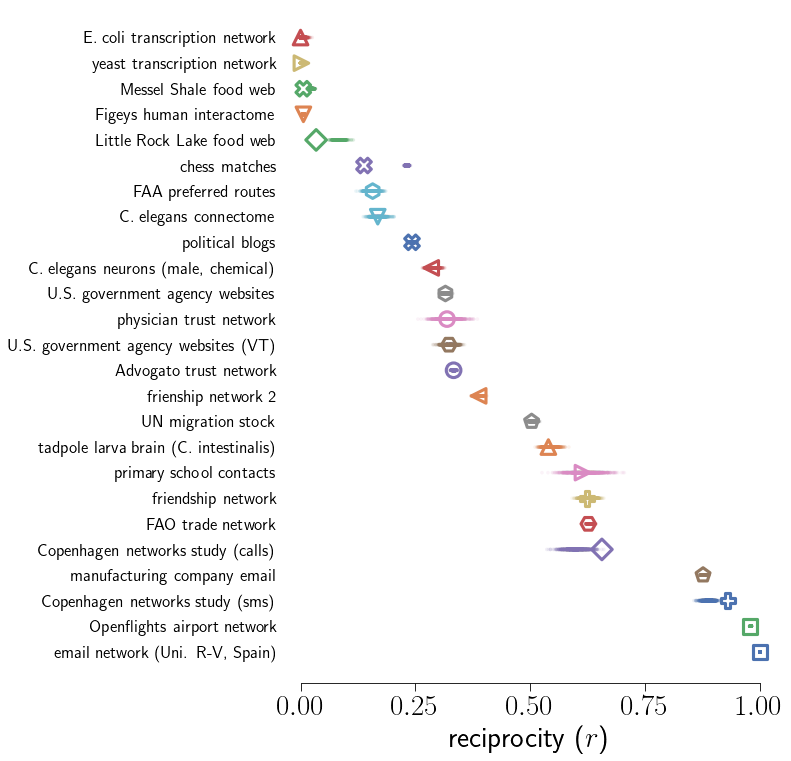

In [4]:
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amssymb,amsmath}'
plt.rcParams["font.size"] = 28
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Fira Sans", 'PT Sans', 'Open Sans', 'Roboto', 'DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams["font.weight"] = 'light'

fig, ax = plt.subplots(figsize=(8.3, 11.7), dpi=75)

ytickspos = []
for network, name, i in zip(networks, names, range(len(names))):
    ypos = 4*i+1
    yarr = ypos*np.ones(len(recip_synth[network]))
    ytickspos.append(ypos)
    ax.scatter(recip_synth[network], yarr, facecolor=colorMap[network], edgecolor='None',            s=12, marker='o',                 linewidth=2, alpha=0.1)
    ax.scatter(recip_real[network],  ypos, facecolor='None',            edgecolor=colorMap[network], s=196, marker=markerMap[network], linewidth=3)

ax.set_xlabel(r'reciprocity ($r$)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.despine(ax=ax, offset=0, trim=True, left=True)

ax.set_xlim(left=-0.025, right=1.025)

ax.tick_params(length=8)

ax.set_yticks(ytickspos)
ax.set_yticklabels(names)
ax.tick_params(axis='y', labelsize='xx-small', left=False)

#fig.tight_layout()
fig.savefig("../figures/pdf/figure_reciprocity_real_vs_synthetic.pdf", bbox_inches='tight')
fig.savefig("../figures/svg/figure_reciprocity_real_vs_synthetic.svg", bbox_inches='tight')